# Random Forest model

In [5]:
from utils import get_data

X_train, X_test, y_train, y_test, y = get_data()


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define column names for categorical and numeric columns
columns_to_drop = ['CustomerId']
categorical_columns = ['Gender', 'Geography']
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary']

# Create the column preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(categories='auto'), categorical_columns),
        ('std_scaler', StandardScaler(), numeric_columns)
    ])

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestClassifier())
])

# Fit the pipeline to the data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Gender', 'Geography']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])])),
                ('random_forest', RandomForestClassifier())])

In [7]:
# Classes
pipe[:-1].get_feature_names_out()

array(['ohe__Gender_Female', 'ohe__Gender_Male', 'ohe__Geography_France',
       'ohe__Geography_Germany', 'ohe__Geography_Spain',
       'std_scaler__CreditScore', 'std_scaler__Age', 'std_scaler__Tenure',
       'std_scaler__Balance', 'std_scaler__NumOfProducts',
       'std_scaler__HasCrCard', 'std_scaler__IsActiveMember',
       'std_scaler__EstimatedSalary'], dtype=object)

In [8]:
# Make predictions
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)

Accuracy:  0.857302996334111
ROC AUC:  0.7381732600498484
Precision/Recall AUC:  0.7381732600498484
Confusion matrix:  [[24584  1439]
 [ 3271  3713]]


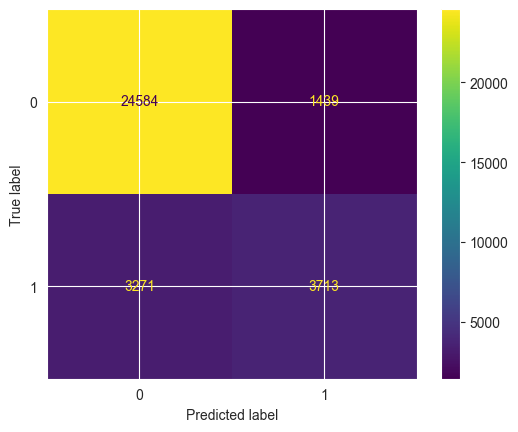

Done saving data!


In [9]:
import utils
import importlib

importlib.reload(utils)

utils.report_data('Random Forest', y, y_test, y_pred, y_pred_proba, pipe.classes_)

In [ ]:
%%timeit

import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import importlib

importlib.reload(utils)

res = utils.train_and_report('Random Forest',
                             RandomForestClassifier(),
                             {"model__n_estimators": [100, 200, 300],
                              "model__max_depth": [10, 20, 30],
                              "model__min_samples_split": [2, 5, 10],
                              "model__min_samples_leaf": [1, 2, 4]}
                             )


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


In [8]:
res.cv_results_

{'mean_fit_time': array([20.20606732, 31.77844294, 31.59607371, 43.07651416,  0.2071557 ,
        43.16230313,  0.11681835,  0.06530388,  0.08085998,  0.06460786,
         0.064315  ,  0.06339264,  0.06439702,  0.06507778,  0.06434019,
         0.06500824,  0.06503264,  0.06437516]),
 'std_fit_time': array([7.79687627e-01, 4.56819339e-01, 6.64168944e-01, 5.20140952e-01,
        1.05953908e-02, 7.66868120e-01, 5.51788020e-02, 5.33559165e-04,
        2.29146193e-02, 4.21309848e-04, 4.15498050e-04, 4.11488780e-04,
        2.89823998e-04, 2.50827526e-04, 4.00506897e-04, 6.04927571e-04,
        4.34586010e-04, 2.65870178e-04]),
 'mean_score_time': array([0.77069521, 0.71917709, 0.64034136, 0.59154956, 0.        ,
        0.59517566, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]),
 'std_score_time': array([0.02871511, 0.01115213, 0.03795804, 0.00883991, 0.        ,
        0.0066